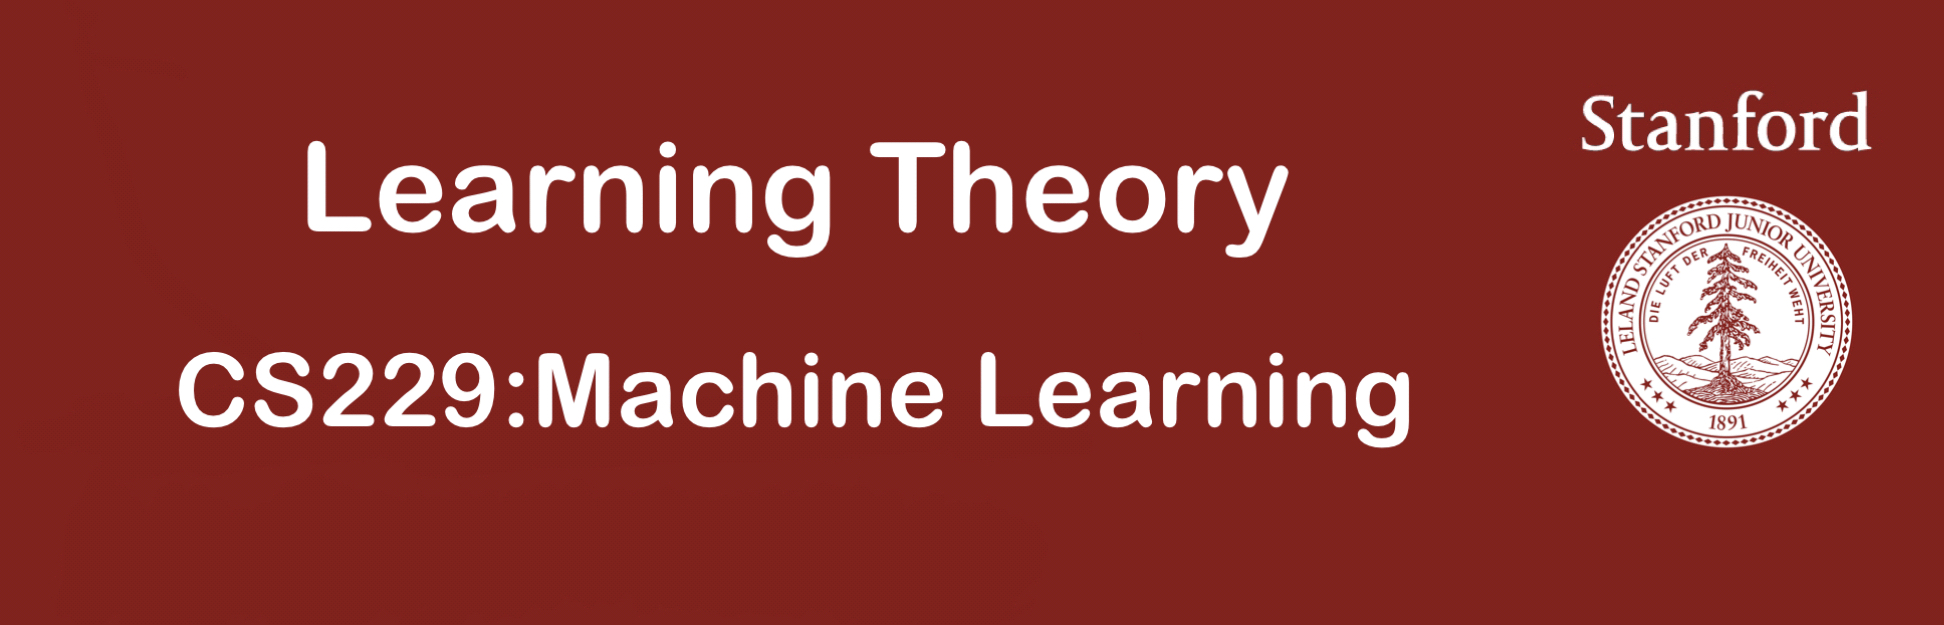

### 1 方差与偏差的权衡(Bias/variance tradeoff

在讨论线性回归的时候，我们尝试用各种不同的模型来拟合训练集，如下图所示：

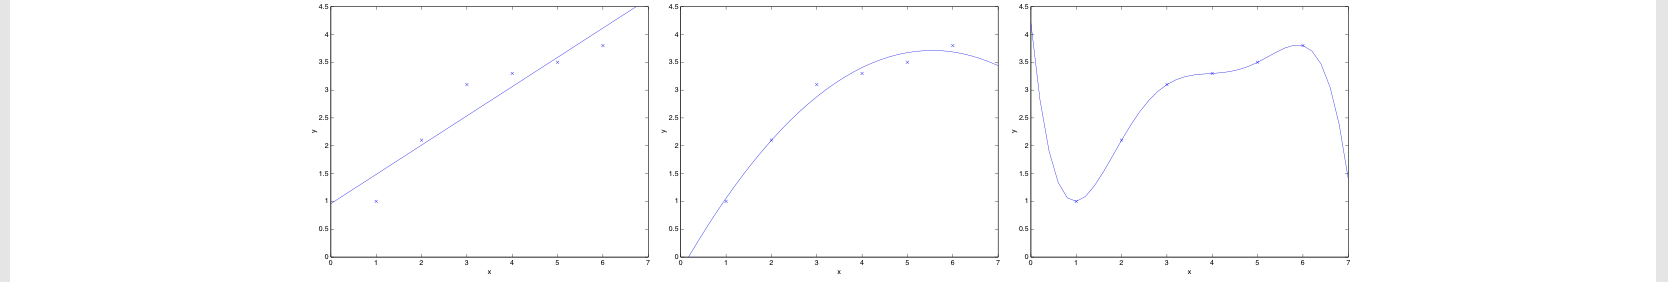

模型可以理解为假设（hypothesis）的集合。可以看到，过于简单或复杂的模型都不能对训练集之外的数据给出合理的预测，这表示训练集学习得到的东西并不能被很好地推广到其他数据上。

我们用 **「泛化误差(generalization error)」** 来量化这种差异，一个假设的泛化误差指**不属于**训练集的样本的预期误差。上图左边的线性拟合与右边的高次多项式拟合都有非常大的泛化误差，但其反映的问题大不相同。

左边的模型得到的假设具有非常大的 **「偏差(bias)」**，偏差较大指的是模型没有捕捉到训练数据的结构特征，即对训练数据 **「欠拟合(underfitting)」**。

右边的模型得到的假设具有非常大的 **「方差(variance)」**，方差较大是指拟合出的模型可能只适合眼下这个小规模的有限训练集，即对训练数据 **「过拟合(overfitting)」**。

我们需要在偏差与方差之间进行权衡：

* 如果模型过于“简单”，参数非常少，那么可能会有很大的偏差，而方差则很小

* 如果模型过于“复杂”，有非常多的参数，那么可能会有很大的方差，而偏差则较小

* 在上图的例子中，用二次函数模型进行拟合得到的效果，要好于其他两种模型。

### 2 预先准备(Preliminaries)

为了系统化地描述误差，这里先给出两个简单但有用的引理：

1. **「联合约束(The union bound)」** 设 $A_1,A_2,...,A_k$ 是 K个不同事件（但不一定互相独立），则有：

$$P(A_1 \cup ...\cup A_k)\leq P(A_1)+...+P(A_k)$$

2. **「Hoeffding 不等式(Hoeffding inequality)」** 设 $Z_1,...Z_{m}$ 是 $m$ 个独立同分布（i.i.d）的随机变量，且其遵循伯努利分布：$P(Z_i=1)=\phi,P(Z_i=0)=1-\phi$，设 $\hat{\phi}=\frac{1}{m}\sum_{i=1}^m Z_i$ 为这些随机变量的均值，现在设任意的 $\gamma \geq 0$ 为某一固定值，则有：

$$P(|\phi-\hat{\phi}|>\gamma)\leq 2\text{exp}(-2\gamma^2 m)$$

第二条引理在学习理论中也称为 **「切尔诺夫约束(Chernoff bound)」**，其表明：如果我们从一个伯努利分布的随机变量中选取平均值 $\hat{\phi}$ 来作为对 $\phi$ 的估计值，那么只要 $m$ 足够大，我们偏移真实值很远的概率就会比较小。

基于上述引理，我们就可以证明在学习理论中一些深刻且重要的理论了。为了简化表述，这里以二元分类为例，其中的分类标签为 $y\in \{0,1\}$。基于二元分类得出的所有结论均可推广至其他问题，包括回归、多元分类等。

假设我们有一个给定的训练集 $S=\{(x_{(i)},y_{(i)});i=1,...,m \}$，其样本规模为 $m$，集合中的训练样本 $(x_{(i)},y_{(i)})$ 是遵循某概率分布 $\mathcal{D}$ 的独立同分布随机变量。对于一个假设 $h$，我们用如下的方法定义 **「训练误差」**（在学习理论中也称为 **「经验风险」** 或者 **「经验误差」**）：

$$\hat{\epsilon}(h)=\frac{1}{m}\sum_{i=1}^m 1\{h(x^{(i)})\neq y^{(i)}\}$$

对于某个特定训练样本集合 $S$，其训练误差记为 $\hat{\epsilon}_S(h)$。

我们定义 **「泛化误差」** 为：

$$\epsilon(h)=P_{(x,y)\sim \mathcal{D}}(h(x)\neq y)$$

其相当于：对于基于分布 $\mathcal{D}$ 给出的一个新样本 $(x,y)$ ，假设 $h$ 对该样本分类错误的概率。注意这里假设训练集与检验假设用的数据集服从同一个分布 $\mathcal{D}$（这通常被认为是 「PAC」 假设之一）。

对于线性分类，令 $h_{\theta}=1{\theta^T x \geq 0}$，那么一种合理的拟合参数 $]theta$ 的方法是使训练误差最小化：

$$\hat{\theta}=\underset{\theta}{\text{argmin}}\hat{\epsilon}(h_{\theta})$$

我们将这个过程称为 **「经验风险最小化(empirical risk minimization)」**，通过这种方法得到的假设结果就是 $\hat{h}=h_{\hat{\theta}}$。ERM 算法是最基础的学习算法，这一节我们主要关注的就是这种算法，之前所介绍的算法如逻辑回归可以看做是对该算法的某种近似。

为了更好地研究学习理论，我们可以对上面的问题进行以下抽象：

我们将学习算法所使用的所有假设的集合定义为 $\mathcal{H}$（hypothesis class），对于线性分类问题来说：

$$\mathcal{H}=\{h_{\theta}:h_{\theta}(x)=1\{\theta^T x \geq 0 ,\theta \in \mathbb{R}^{n+1}\}$$

现在可以将 ERM 看作是对函数集合 $\mathcal{H}$ 的最小化，即：

$$\hat{h}=\underset{h\in \mathcal{H}}{\text{argmin}}\hat{\epsilon}(h)$$

### 3 有限个假设(The case of finite $\mathcal{H}$)

我们先考虑假设集 $\mathcal{H}$ 中的假设个数「有限」（假定个数为 $k$ ）的情况。我们会证明下面两个结论：

1. 对于任意的 $h$ ，$\hat{\epsilon}(h)$ 都是对 $\epsilon(h)$的可靠估计

2. $\hat{h}$ 的泛化误差 $\epsilon(\hat{h})$ 存在上界

对于某个特定的假设 $h_i \in \mathcal{H}$，考虑以下的伯努利随机变量 $Z$：

$$Z = 1\{ h_i(x)\neq y \}$$

该变量表示 $h_i$ 是否进行了错误的分类。对于特定的变量 $(x^{(j)},y^{(j)}),Z_j=1\{h_i(x^{(j)}) \neq y^{(j)}\}$。

我们可以看出，泛化误差 $\epsilon(h_i)$ 是 $Z$ 的期望值，同时训练误差可以表示为 $Z_j$ 的均值：

$$\hat{\epsilon}(h_i)=\frac{1}{m}\sum_{j=1}^m Z_j$$

根据 Hoeffding 不等式，我们有：

$$P(|\epsilon(h_i)-\hat{\epsilon}(h_i)|>\gamma)\leq 2exp(-2 \gamma^2 m)$$

这表明，对于特定的假设 $h_i$，如果 $m$ 很大，那么训练误差与泛化误差接近的概率将会非常大。

我们希望证明这一结论对于假设集中所有的假设均成立。为此我们需要定义 $A_i$ 为事件 $|\epsilon(h_i)-\hat{\epsilon}(h_i)|>\gamma$。我们已经证明了，对于任意特定的 $A_i$，$P(A_i)\leq 2 exp(-2\gamma^2 m)$ 成立。根据联合约束，我们有：

$$P(\exists h\in \mathcal{H}.|\epsilon(h_i)-\hat{\epsilon}(h_i)|>\gamma)=P(A_i \cup ... \cup A_k)\leq \sum_{i=1}^k P(A_i)\leq \sum_{i=1}^k 2exp(-2\gamma^2 m)=2k\text{exp}(-2\gamma^2 m)$$

等式两边同时用 1 去减，可以得到：

$$P(\neg \exists h\in \mathcal{H}.|\epsilon(h_i)-\hat{\epsilon}(h_i)|>\gamma)=P(\forall h\in \mathcal{H}.|\epsilon(h_i)-\hat{\epsilon}(h_i)|\leq \gamma)\geq 1-2k \text{exp}(-2\gamma^2 m)$$

因此对于任意的 $h\in \mathcal{H}$，$\epsilon(h)$ 和 $\hat{\epsilon}(h)$ 相差在 $\gamma$ 之内的概率至少为 $1-2k\text{exp}(-2 \gamma^2 m)$。该结论被称为 **「一致收敛(uniform convergence)」**.

我们感兴趣的变量有三个：$m$，$\gamma$，以及训练误差与泛化误差相差大于 $\gamma$ 的概率 $\delta$。我们可以将其中的任意一个变量用其他两个变量来约束，例如：

❝ 给定 $\gamma$ 和某个 $\delta>0$，$m$ 至少应该取多少，才能保证训练误差与泛化误差相差在 $\gamma$ 之内的概率至少为 $1-\delta$ ？❞
根据一致收敛的结论，我们有 $1-\delta \leq 1-2k\text{exp}(-2\gamma^2 m)$，从而得到：

$$m\geq \frac{1}{2\gamma^2}\text{log}\frac{2k}{\delta}$$

这个约束告诉我们为了对结果有所保证我们需要有多大的训练样本量。某个算法为了实现一定程度的性能所需要的训练集规模 $m$ 也被称为该算法的 **「样本复杂度(sample complexity)」**。

上面的约束还表明为了保证结果，所需的训练集规模只是假设个数 $k$ 的 **「对数」**。

类似地，我们可以固定 $m$ 和 $\delta$ 的值，求解 $\gamma$，得到

$$\gamma \geq \sqrt{\frac{1}{2m}\text{log}\frac{2k}{\delta}}$$

从而对所有的 $h\in \mathcal{H}$，至少有 $1-\delta$ 的概率保证：

$$|\hat{\epsilon}(h)-\epsilon(h)| \leq \sqrt{\frac{1}{2m}\text{log}\frac{2k}{\delta}}$$

下面，假定一致收敛成立，即对于任意的 $h \in\mathcal{H}$，都有 $|\hat{\epsilon}(h)-\epsilon(h)|\leq \gamma$，我们将证明 $\hat{h}$ 的泛化误差 $\epsilon(\hat{h})$ 存在上界。

定义 $h^*=\underset{h\in\mathcal{H}}{\text{argmin}}\epsilon(h)$ 为假设集 $\mathcal{H}$ 中的最佳假设（使泛化误差最小），则有：



第一行不等式使用了一致收敛的结论
第二行不等式使用了 [公式] 的定义（最小化 [公式] 得到），因此对于所有的 [公式]，都有 [公式]
第三行不等式同样使用了一致收敛的结论（注意大小关系与第一行相比颠倒了）
我们得到：如果一致收敛发生，那么 [公式] 的泛化误差最多比假设集 [公式] 中的最佳假设大 [公式]。进一步地，将上述结论整合在一起，可以得到如下定理：

「定理」：令 [公式]，保持 [公式] 和 [公式] 不变，则在至少 [公式] 的概率下 ，我们有：

[公式]

上述定理为我们量化了模型选择中方差与偏差的权衡问题。假设我们有一个假设集 [公式]，考虑将它更换为某个更大的假设集 [公式]（可以理解为从简单的模型换成复杂的模型），那么对于上面的定理，第一项 [公式] 只会减少（因为可选择的假设更多了），这可以理解为通过使用一个更大的假设集，减少了「偏差」；但是，如果 [公式] 变大，那么第二项会增加，这对应为「方差」的增加。

与之前类似，我们可以得到下述关于样本复杂度的推论：

「推论」：令 [公式]，保持 [公式] 和 [公式] 不变，那么为了满足 [公式] 成立的概率至少为 [公式]，则有：

